# Multilayer Perceptron
In this second tutorial we will implement a Multilayer Perceptron (MLP) for a classification task using [Keras](http://keras.io/).

In a MLP, the output of each layer is computed using the activations from the previous one, as follows:

$$\mathbf{h}_{i} = \sigma(\mathbf{W}_i \mathbf{h}_{i-1} + \mathbf{b}_i)$$

where $\mathbf{h}_i$ is the activation vector from the $i$-th layer (or the input data for $i=0$), $\mathbf{W}_i$ and $\mathbf{b}_i$ are respectively the weight matrix and the bias vector for the $i$-th layer, and $\sigma(\cdot)$ is the activation function. In our example, we will use the ReLU activation function for the hidden layers and softmax for the last layer.

To regularize the model, we will also insert a Dropout layer between consecutive hidden layers. Dropout works by “dropping out” some unit activations in a given layer, that is setting them to zero with a given probability.

Our loss function will be the categorical crossentropy.

## Model definition
Keras supports two different kind of models: the [Sequential](http://keras.io/models/#sequential) model and the [Graph](http://keras.io/models/#graph) model. The former is used to build linear stacks of layer (so each layer has one input and one output), and the latter supports any kind of connection graph.

In our case we build a Sequential model with three [Dense](http://keras.io/layers/core/#dense) (aka fully connected) layers, with some [Dropout](http://keras.io/layers/core/#dropout). Notice that the output layer has the softmax activation function. 
The resulting model is actually a `function` of its own inputs implemented using the Keras backend (see previous tutorial). We apply the binary crossentropy loss and choose SGD as the optimizer. Keras supports as well a variety of different [optimizers](http://keras.io/optimizers/) and [loss functions](http://keras.io/objectives/), which you may want to check out. 

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer=SGD())

Using TensorFlow backend.


## Data preparation
We will train our MLP on the MNIST dataset, which consists of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Since this dataset is provided with Keras, we just ask the `keras.dataset` model for training and test data, reshape them to be in vectorial form, and normalize between 0 and 1.

The `binary_crossentropy` loss expects a one-hot-vector as input, therefore we apply the `to_categorical` function from `keras.utilis` to convert integer labels to one-hot-vectors.

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## Training
Having defined and compiled the model, it can be trained using the `fit` function. We also specify a validation dataset to monitor validation loss and accuracy.

In [3]:
history = model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=100,
          show_accuracy=True, verbose=0,
          validation_data=(X_test, Y_test))

The return value of the `fit` function is a `keras.callbacks.History` object which contains the entire history of training/validation loss and accuracy, for each epoch. We can therefore plot the behaviour of loss and accuracy during the training phase.

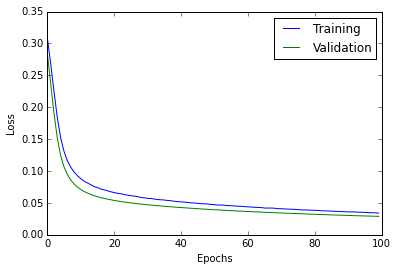

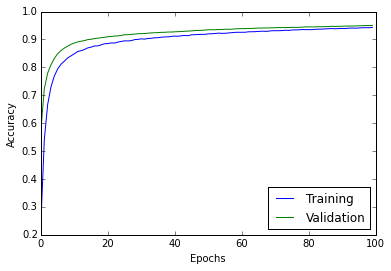

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

After 100 epochs, we get a 95% validation accuracy. If you continue training, at some point the validation loss will start to increase: that is when the model starts to overfit. It always necessary to monitor training and validation loss during the training of any kind of Neural Network, either to detect overfitting or to evaluate the behaviour of the model.

We have seen how to build a simple Neural Network with only fully-connected layers. In the next tutorial we will see how to build and train a Convolutional Neural Network with Keras.